# My own Titanic stuff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

import utils_library as ut

In [2]:
from scipy import stats
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Exploratory Data Analysis at Dataframe level

## Having a look at the train dataset

In [3]:
ds_train = ut.load_full_train_dataset()

In [4]:
ds_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
ds_train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [6]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


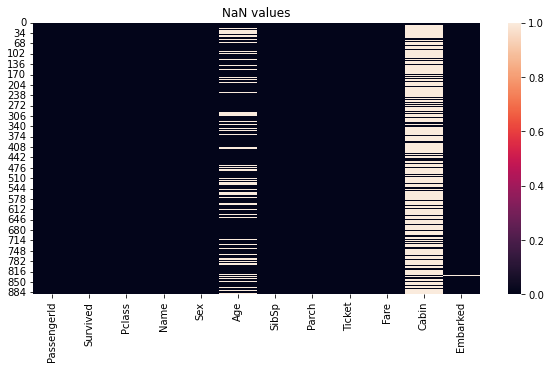

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
ut.display_null_nan_values(ds_train)

## Having a look at the test dataset

In [8]:
ds_test = ut.load_full_test_dataset()

In [9]:
ds_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
ds_test.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


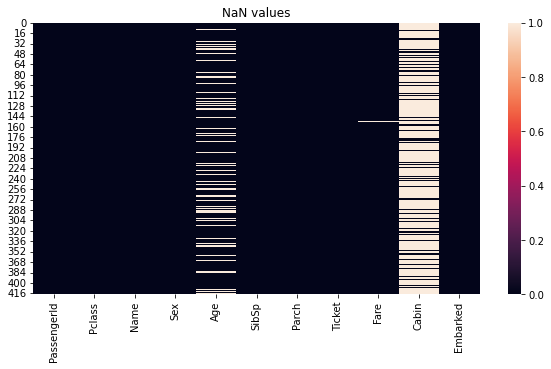

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
ds_test.info()

ut.display_null_nan_values(ds_test)

In [12]:
column_names = ['Pclass', 'Sex', 'SibSp', 'Parch'] #, 'Embarked']

print(f'Looking at unique values in Train dataset')
for c in column_names:
    print(f'column = {c} ; values are : {sorted(ds_train[c].unique())}')
    
print(f"column = Embarked : values are {ds_train['Embarked'].unique()}")

print(f'\n')
          
print(f'Looking at unique values in Test dataset')
for c in column_names:
    print(f'column = {c} ; values are : {sorted(ds_test[c].unique())}')
    
print(f"column = Embarked : values are {ds_test['Embarked'].unique()}")

Looking at unique values in Train dataset
column = Pclass ; values are : [1, 2, 3]
column = Sex ; values are : ['female', 'male']
column = SibSp ; values are : [0, 1, 2, 3, 4, 5, 8]
column = Parch ; values are : [0, 1, 2, 3, 4, 5, 6]
column = Embarked : values are ['S' 'C' 'Q' nan]


Looking at unique values in Test dataset
column = Pclass ; values are : [1, 2, 3]
column = Sex ; values are : ['female', 'male']
column = SibSp ; values are : [0, 1, 2, 3, 4, 5, 8]
column = Parch ; values are : [0, 1, 2, 3, 4, 5, 6, 9]
column = Embarked : values are ['Q' 'S' 'C']


In [13]:
ds_train[ds_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## Take-aways looking at train and test datasets :

- same columns, except test dataset does not have the 'Survived' column
- same columns types
- we will drop : 'PassengerId', 'Name', 'Ticket', 'Cabine'
- 'Pclass' : int64 feature, ordinal in list [1, 2, 3] : normalize
- 'Sex' : object feature, in list ['male', 'female'] : one-hot encoding
- 'Age' : float64 feature with NaNs : handle missing values (with mean for example)
- 'SibSp' : int64 ordinal feature in [0, ..., 8] : normalize
- 'Parch' : int64 ordinal feature in [0, .... 9] : normalize
- 'Fare' : float64 feature, handle 1 NaN in test dataset
- 'Embarked' : handle 2 missing values in train dataset, then one-hot encoding from ['S', 'C', 'Q']

## Univariate data exploration

In [14]:
# On commence par classer les variables en "categorical" et "continuous"

cat_vars = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']  # 'Cabin',
cont_vars = ['Age', 'Fare']

-------------------------------------------------------
variable = Survived
Survived
0           549
1           342
dtype: int64


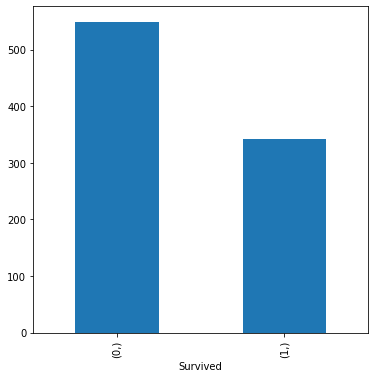

-------------------------------------------------------
variable = Pclass
Pclass
3         491
1         216
2         184
dtype: int64


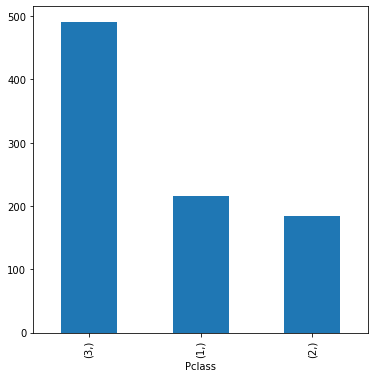

-------------------------------------------------------
variable = Sex
Sex   
male      577
female    314
dtype: int64


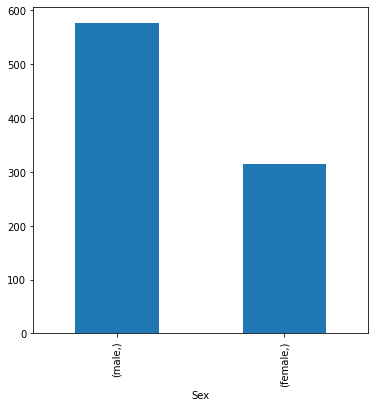

-------------------------------------------------------
variable = SibSp
SibSp
0        608
1        209
2         28
4         18
3         16
8          7
5          5
dtype: int64


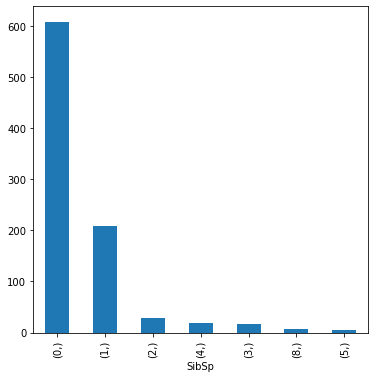

-------------------------------------------------------
variable = Parch
Parch
0        678
1        118
2         80
3          5
5          5
4          4
6          1
dtype: int64


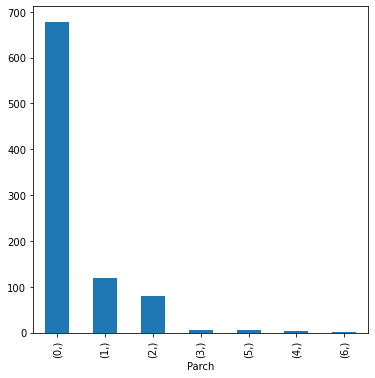

-------------------------------------------------------
variable = Embarked
Embarked
S           644
C           168
Q            77
dtype: int64


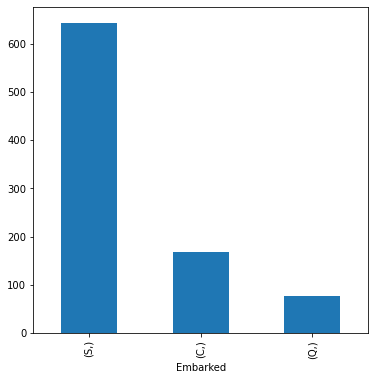

In [15]:
for cat in cat_vars:
    print(f"-------------------------------------------------------")
    print(f"variable = {cat}")
    ut.analyze_categorical(ds_train[cat])
    plt.show()

-------------------------------------------------------
variable = Age


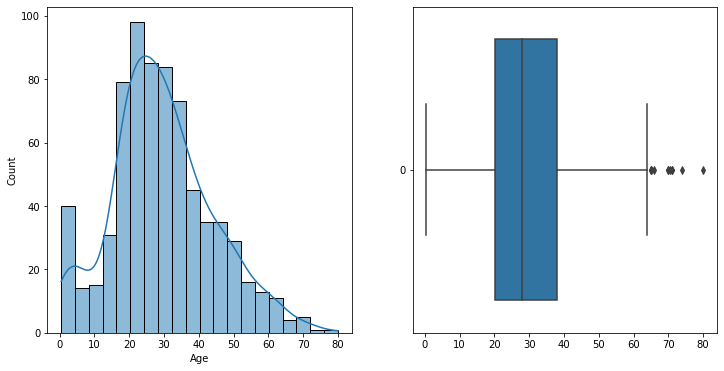

counting 891 values
moyenne = 29.69911764705882
std dev = 14.516321150817317
mediane = nan
-------------------------------------------------------
variable = Fare


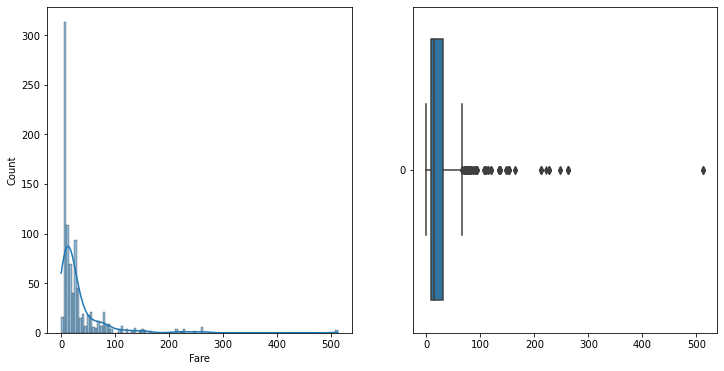

counting 891 values
moyenne = 32.2042079685746
std dev = 49.66553444477411
mediane = 14.4542


In [16]:
for conti in cont_vars:
    print(f"-------------------------------------------------------")
    print(f"variable = {conti}")
    ut.analyze_continuous(ds_train[conti])
    plt.show()

In [17]:
# some passengers did not pay ?

ds_train[ds_train['Fare']==0.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [18]:
# some paid a lot

ds_train[ds_train['Fare']>=200.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


## Insight :

- peu de survivants (342 sur 891)
- majorité de 3e classe (491 sur 891)
- majorité d'hommes (577 sur 891)
- majorité de célibataires (608) et couples (209)
- depuis Southampton (644)
- plutôt jeune (<30 ans)

## Analysis of Output variable vs input variable, one by one

Survived
0           549
1           342
dtype: int64


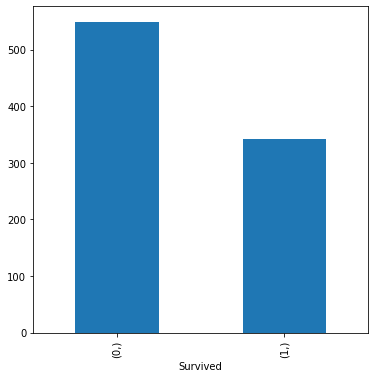

In [19]:
y = ds_train['Survived']

ut.analyze_categorical(y)

In [20]:
output_var = 'Survived'
cat_vars = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
cont_vars = ['Age', 'Fare']

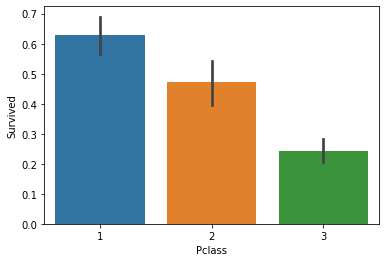

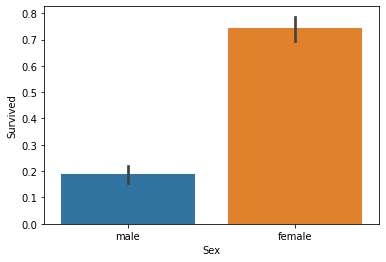

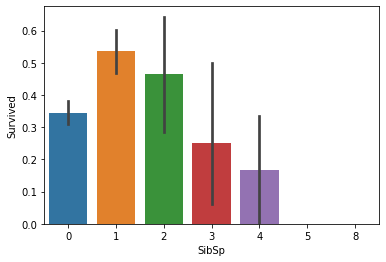

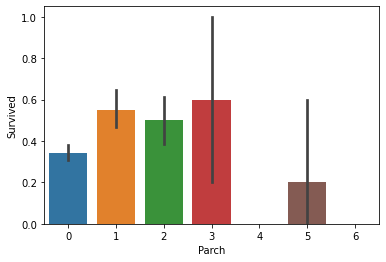

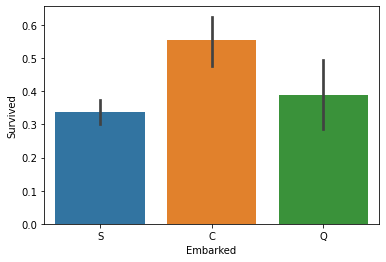

In [21]:
ut.plot_cat_v_cat(output_var,
                   cat_vars,
                   ds_train)

## Insight :

- corrélation positive forte entre le taux de survie et la classe
- corrélation forte entre la survie et le sexe femme
- les couples s'en sont mieux sortis que les célibataires
- les passagers qui ont embarqué à Cherbourg s'en sont mieux sortis (port d'embarquement peut-être corrélé avec le tarif ou la classe)

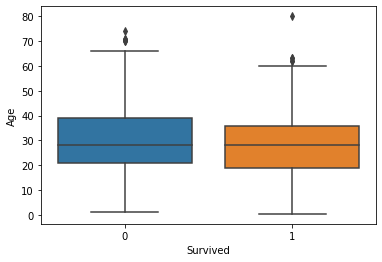

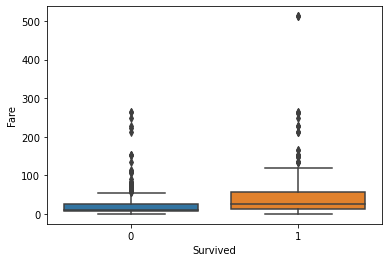

In [22]:
ut.plot_cat_v_cont(output_var,
                    cont_vars,
                    ds_train)

## Insight :

- pas d'influence de l'age !
- peu d'influence du tarif : bizarre

In [23]:
### Last : correlation matrix

In [24]:
# #scatterplot for continuous variables
# sns.set()
# cols = ['Age', 'Fare']
# # Not considering : 'PassengerId', 'Name', 'Ticket', 'Cabin', 
# # Also not considering categorical variables : 'Survived', 'Pclass', 'Sex', 'SibSp','Parch', 'Embarked'
# sns.pairplot(ds_train[cols], height = 4.0)
# plt.show()

In [25]:
# plt.figure(figsize=(12,8))
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# Not considering 'PassengerId', 'Name', 'Ticket', 'Cabin', 

ds_num = ds_train.copy()
ds_num['Sex'] = ds_train['Sex'].map({'male' : 1, 'female' : 0}) # transformation nécessaire pour prise en compte dans la matrice de corrélation
ds_num['Embarked'] = ds_train['Embarked'].map({'C':0, 'S':1, 'Q':2}) # transformation nécessaire pour prise en compte dans la matrice de corrélation

# ds_num.head(10)

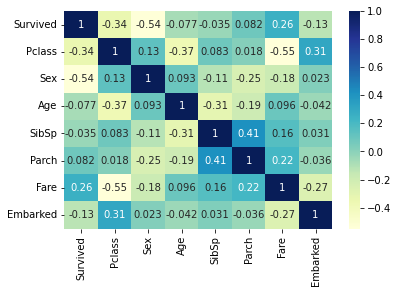

In [26]:
sns.heatmap(ds_num[cols].corr(),annot=True,cmap="YlGnBu")
plt.show()

## Insight :

- on retrouve les corrélations fortes entre la survie et 1/ le sexe, 2/ la classe, 3/ le tarif, 4/ le port d'embarquement, puis loin 5/ Parch, 6/ Age, 7/ SibSp
- NB classe, tarif et port d'embarquement corrélés entre eux évidemment

# Datasets pipeline

### Strategies :

- 'PassengerId' : drop
- 'Survived' : isolate as the target of the binary classification, prior to pipeline
- 'Pclass' : leave untouched, treat as ordinal variable
- 'Name' : drop
- 'Sex' : one-hot-encode, treat as categorical variable
- 'Age' : handle NaN values
- 'SibSp' : leave, treat as ordinal variable
- 'Parch': leave, treat as ordinal variable
- 'Ticket' : drop
- 'Fare' : keep, treat as continuous variable, handle NaN value (1 in test dataset)
- 'Cabin' : drop
- 'Embarked' : one-hot-encode, treat as categorical variable, handle NaN value (2 NaN in train dataset)

In [27]:
from utils_library import OHEColumnsTransformer, AgeFareHandler, FeatureDropper, AgeFareScaler

In [28]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('FeatureDropper', FeatureDropper()),
                 ('Sex_and_Embarked_handler', OHEColumnsTransformer()),
                 ('Age_and_Fare_handler', AgeFareHandler()),
                 ('Age_and_Fare_Scaler', AgeFareScaler())
                 ]
                )

# pipe

In [29]:
# essai = ds_train.copy()

# ut.display_null_nan_values(essai)

# print(essai.info())

In [30]:
# essai.head(5)

In [31]:
# essai = pipe.transform(essai)

In [32]:
# ut.display_null_nan_values(essai)

# print(essai.info())

In [33]:
# essai.head(10)

# Models

In [34]:
def get_train_test():
    """wrapper to get test train split for a classifier
    """
    
    # reloads original dataset and preprocess

    ds_full = ut.load_full_train_dataset()
    ds_full = pipe.transform(ds_full)
    
    # isolate target column
    X = ds_full.drop(columns=['Survived'])
    y = ds_full['Survived']
    
    # create train/test split, preprocess, and isolate target values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [35]:
X_train, X_test, y_train, y_test = get_train_test()

# Baseline Model - Logistic Regression

In [36]:
# Regression Logistique

clf_lr = LogisticRegression(random_state=42)  # by default, L2 regularization

clf_lr.fit(X_train, y_train.to_numpy().reshape(len(y_train,)))

print(f'Logistic Regression accuracy score = {clf_lr.score(X_test, y_test)}')

Logistic Regression accuracy score = 0.7752808988764045


## SVM with Grid Search

In [37]:
# SVM

clf_svm = SVC(random_state=42, C=5.5)

clf_svm.fit(X_train, y_train.to_numpy().reshape(len(y_train,)))

print(f'SVM accuracy score = {clf_svm.score(X_test, y_test)}')

SVM accuracy score = 0.8314606741573034


In [38]:
# Grid Search

parameters = { "C" : [4.0, 4.5, 5.0, 5.5, 6.0] }

clf_opt = GridSearchCV(clf_svm, parameters)
clf_opt.fit(X_train, y_train.to_numpy().reshape(len(y_train,)))

print(clf_opt.best_params_)

{'C': 5.5}


### Kaggle Submission - SVM

In [39]:
ds_test = ut.load_full_test_dataset()

passenger_id = ds_test['PassengerId']

ds_test = pipe.transform(ds_test)

y_pred = clf_svm.predict(ds_test)

output = pd.concat([pd.DataFrame(data=passenger_id), pd.DataFrame(data=y_pred, columns=['Survived'])], axis=1)

In [40]:
output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [41]:
cwd = os.getcwd()
submission_file_path = cwd + '/titanic/submission.csv'

output.to_csv(submission_file_path, index=False)

# NB : Kaggle score is 0.76555 ! (vs 0.83 model score)

# XGBoost

In [42]:
import xgboost as xgb

c:\Users\benjamin.deporte\Anaconda3\envs\toy\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [43]:
clf_xgb = xgb.XGBClassifier(n_estimators=8,
                            max_depth=3,
                            )

In [44]:

clf_xgb.fit(X_train, y_train.to_numpy().reshape(len(y_train,)),
            eval_set=[(X_test, y_test.to_numpy().reshape(len(y_test),))],
            early_stopping_rounds=3
            )

[08:40:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.57162
[1]	validation_0-logloss:0.50509
[2]	validation_0-logloss:0.46533
[3]	validation_0-logloss:0.44377
[4]	validation_0-logloss:0.43033
[5]	validation_0-logloss:0.42618
[6]	validation_0-logloss:0.42273
[7]	validation_0-logloss:0.41962


c:\Users\benjamin.deporte\Anaconda3\envs\toy\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\benjamin.deporte\Anaconda3\envs\toy\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=8, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
print(f'XGB accuracy score = {clf_xgb.score(X_test, y_test)}')

XGB accuracy score = 0.8258426966292135


In [46]:
ds_test = ut.load_full_test_dataset()

passenger_id = ds_test['PassengerId']

ds_test = pipe.transform(ds_test)

y_pred = clf_xgb.predict(ds_test)

output = pd.concat([pd.DataFrame(data=passenger_id), pd.DataFrame(data=y_pred, columns=['Survived'])], axis=1)

In [47]:
output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [48]:
cwd = os.getcwd()
submission_file_path = cwd + '/titanic/submission.csv'

output.to_csv(submission_file_path, index=False)

# NB : Kaggle score is 0.77511 ! (vs 0.8258 model score)

# Gradient Boosting + Cross Validation + Grid Search

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [73]:
# Instantiate a Gradient Boosting Classifier out of Scikit-Learn

# clf_gbc = GradientBoostingClassifier()

In [74]:
# Set-Up Cross Validation

# reloads original dataset and preprocess
ds_full = ut.load_full_train_dataset()
ds_full = pipe.transform(ds_full)
    
# isolate target column
X = ds_full.drop(columns=['Survived'])
y = ds_full['Survived']

# ==> X,y are the full length dataset from train.csv, on which we will do a K-fold cross-validation set up
# instantiate a cv generator object. RSK will preserve the target slight imbalance
rsk = RepeatedStratifiedKFold(n_splits=5,
                              n_repeats=3,
                              random_state=42
                              )

In [75]:
# scores = cross_val_score(estimator=clf_gbc,
#                 X=X, y=y, cv=rsk)

mean score = 0.8204257390126747
standard deivation = 0.0228814105027436


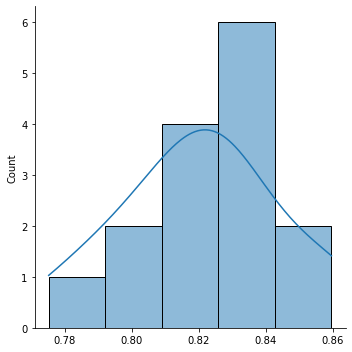

In [77]:
# sns.displot(scores, kde=True)
# print(f'mean score = {scores.mean()}')
# print(f'standard deivation = {scores.std()}')

In [89]:
# setting up Grid Search

gbc = GradientBoostingClassifier(verbose=0)   # generic Gradient Boosting Model, whose optimal hyper-parameters we're going to find with Grid Search

parameters = {'learning_rate' : [0.01, 0.1, 1.0],  # hyperparameters we want to search for best value
              'n_estimators' : [100, 500, 1000],
              'max_depth' : [2, 3, 5]
              }

clf_gbc_best = GridSearchCV(estimator=gbc, 
                            param_grid=parameters,
                            scoring='accuracy',
                            cv=rsk)   # grid search object, which includes the 'generic' estimator model and the parameters grid we'll search through

In [90]:
clf_gbc_best.fit(X,y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [85]:
print(f'best score is {clf_gbc_best.best_score_}\n')

print(f'best parameters are :')
print(clf_gbc_best.best_params_)

best score is 0.823781713536046
best parameters are : 

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}


In [91]:
ds_test = ut.load_full_test_dataset()

passenger_id = ds_test['PassengerId']

ds_test = pipe.transform(ds_test)

y_pred = clf_gbc_best.predict(ds_test)

output = pd.concat([pd.DataFrame(data=passenger_id), pd.DataFrame(data=y_pred, columns=['Survived'])], axis=1)

output.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [92]:
cwd = os.getcwd()
submission_file_path = cwd + '/titanic/submission.csv'

output.to_csv(submission_file_path, index=False)

# NB : Kaggle score is 0.75598 ! (vs 0.8237 model score)